In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


497


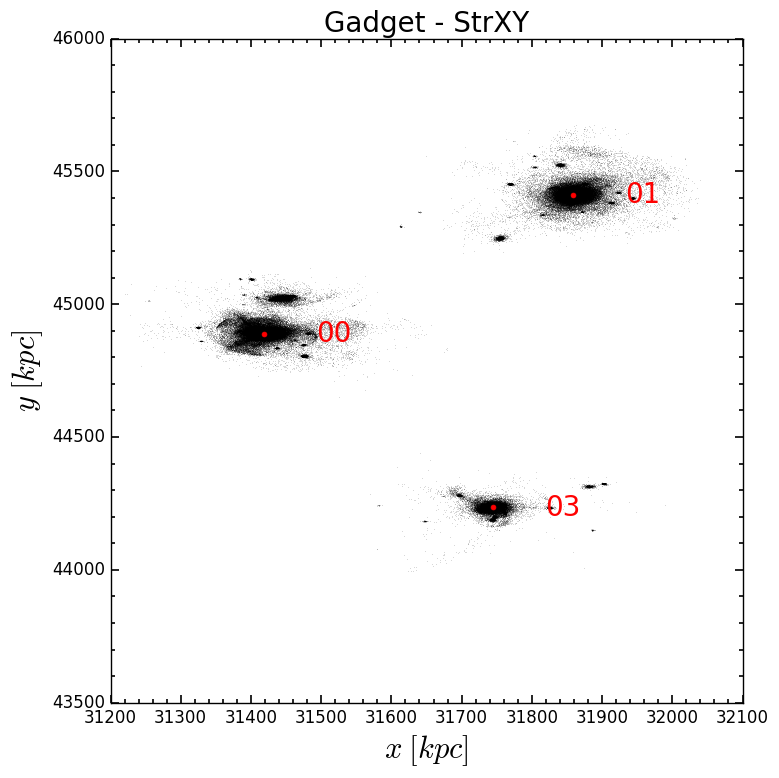

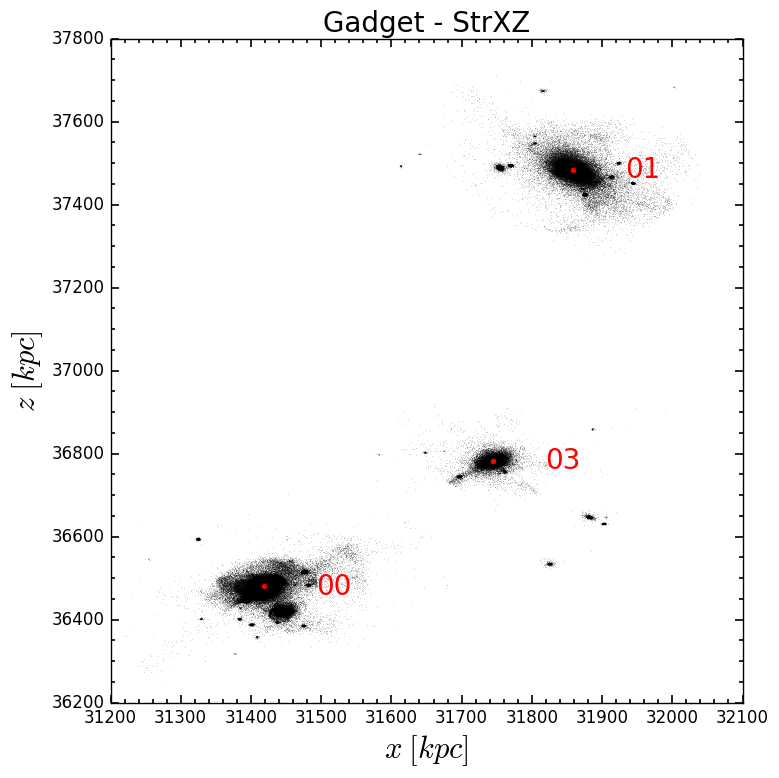

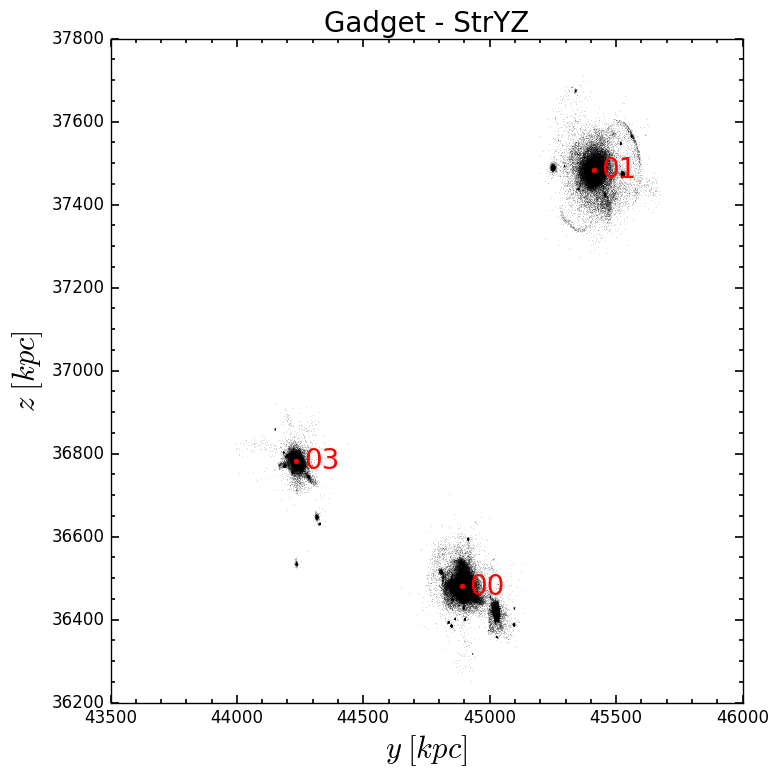

In [4]:
#Graficos de Densidad de las Estrellas
import matplotlib.pyplot as plt
import numpy as np
import h5py

h=0.732
a0=1
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
vector = ('00','01','03','09','13','14','18','19','20','21')

snapshot=range(497,496,-1)
for isnap in snapshot:
    snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')
    
    print isnap
    for i in range(0,3):
        pstr = snap['subhalo_0'+ str('%s'%vector[i]) +'/Str/Coordinates'].value
        cm   = snap['subhalo_0'+ str('%s'%vector[i]) +'/Center'].value
        aexp = snap['subhalo_0'+ str('%s'%vector[i]) +'/Time'].value

        xstr = pstr[:,0]*aexp/h
        ystr = pstr[:,1]*aexp/h
        zstr = pstr[:,2]*aexp/h
        cm = cm*aexp/h
        
        #xstr = xstr/1000
        #ystr = ystr/1000
        #zstr = zstr/1000
        #cm = cm/1000
        
        fig=plt.figure(1, figsize=(8,8))
        fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
        ax=fig.add_subplot(111)
        ax.plot(xstr,ystr,'.', markersize=0.1, color = 'k')
        ax.plot(cm[0],cm[1],'.', markersize=7, color = 'red')
        #ax.set_ylim(-1000,1000)
        #ax.set_xlim(-0.7,0)
        #ax.set_title('sh00', fontsize=22)
        ax.set_title('Gadget - StrXY', fontsize=20)
        ax.set_xlabel(u'$x\;[kpc]$', fontsize=22)
        ax.set_ylabel(u'$y\;[kpc]$', fontsize=22)
        ax.minorticks_on()
        ax.tick_params( labelsize=12)
        ax.tick_params('both', length=3, width=1.2,which='minor')
        ax.tick_params('both', length=6, width=1.2,which='major')
        '''if i != 8:
            plt.text(x = cm[0], y = cm[1]+100, s = str('%s'%vector[i]), fontsize = 20, 
                     verticalalignment = 'center', horizontalalignment = 'center', color = 'g')
        else:'''
        plt.text(x = cm[0]+100, y = cm[1], s =str('%s'%vector[i]), fontsize = 20, 
                verticalalignment = 'center', horizontalalignment = 'center', color = 'r')
            
        fig=plt.figure(2, figsize=(8,8))
        fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
        ax=fig.add_subplot(111)
        ax.plot(xstr,zstr,'.', markersize=0.1, color = 'k')
        ax.plot(cm[0],cm[2],'.', markersize=7, color = 'red')
        #ax.set_ylim(-1000,1000)
        #ax.set_xlim(-0.7,0)
        ax.set_title('Gadget - StrXZ', fontsize=20)
        ax.set_xlabel(u'$x\;[kpc]$', fontsize=22)
        ax.set_ylabel(u'$z\;[kpc]$', fontsize=22)
        ax.minorticks_on()
        ax.tick_params( labelsize=12)
        ax.tick_params('both', length=3, width=1.2,which='minor')
        ax.tick_params('both', length=6, width=1.2,which='major')
    
        '''if i != 5 and i !=8:
            plt.text(x = cm[0], y = cm[2]+100, s = str('%s'%vector[i]), fontsize = 20, 
                 verticalalignment = 'center', horizontalalignment = 'center', color = 'g')
        else:'''
        plt.text(x = cm[0]+100, y = cm[2], s =str('%s'%vector[i]), fontsize = 20, 
                verticalalignment = 'center', horizontalalignment = 'center', color = 'r')
            
        fig=plt.figure(3, figsize=(8,8))
        fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
        ax=fig.add_subplot(111)
        ax.plot(ystr,zstr,'.', markersize=0.1, color = 'k')
        ax.plot(cm[1],cm[2],'.', markersize=7, color = 'red')
        #ax.set_ylim(-1000,1000)
        #ax.set_xlim(-0.7,0)
        ax.set_title('Gadget - StrYZ', fontsize=20)
        ax.set_xlabel(u'$y\;[kpc]$', fontsize=22)
        ax.set_ylabel(u'$z\;[kpc]$', fontsize=22)
        ax.minorticks_on()
        ax.tick_params( labelsize=12)
        ax.tick_params('both', length=3, width=1.2,which='minor')
        ax.tick_params('both', length=6, width=1.2,which='major')
    
        plt.text(x = cm[1]+100, y = cm[2], s = str('%s'%vector[i]), fontsize = 20, 
                     verticalalignment = 'center', horizontalalignment = 'center', color = 'r')
plt.show()


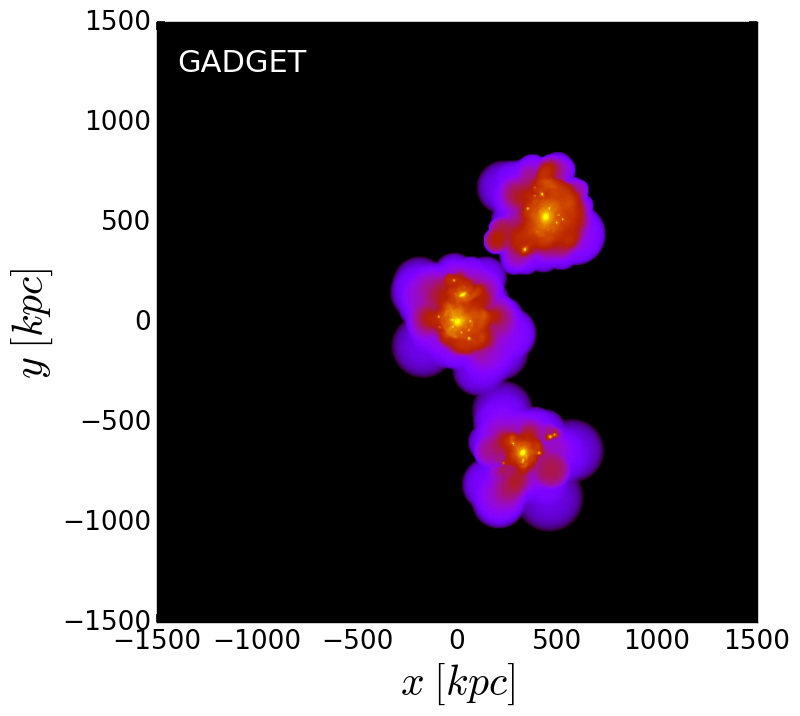

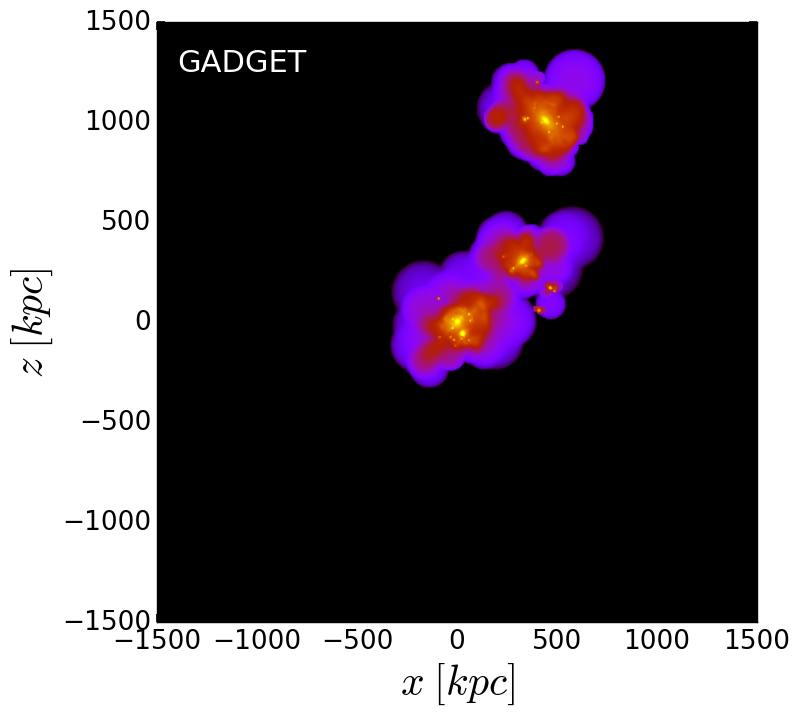

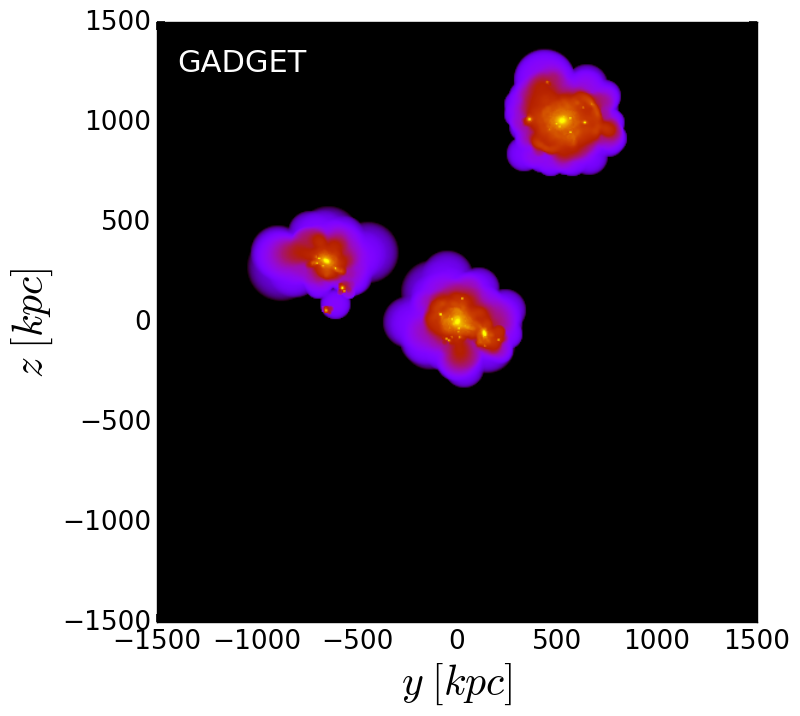

In [87]:
#Graficos de Densidad de las Estrellas
import matplotlib.pyplot as plt
import numpy as np
import h5py
import sphviewer as sph

h=0.732
a0=1
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
vector = ('00','01','03','09','13','14','18','19','20','21')
vector2 = ('M31', 'MW', 'M33')

xx =[]
yy =[]
zz =[]
masa =[]
snapshot=range(497,496,-1)
for isnap in snapshot:
    snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')
    
    #print isnap
    for i in range(0,3):
        pstr = snap['subhalo_0'+ str('%s'%vector[i]) +'/Str/Coordinates'].value
        cm   = snap['subhalo_0'+ str('%s'%vector[i]) +'/Center'].value
        aexp = snap['subhalo_0'+ str('%s'%vector[i]) +'/Time'].value
        masa_str = snap['subhalo_0'+ str('%s' %vector[i]) + '/Str/Masses'].value
        masa_str = masa_str/h
        cm0   = snap['subhalo_000/Center'].value
        
        #if i == 0:
        xstr = (pstr[:,0]-cm0[0])*aexp/h
        ystr = (pstr[:,1]-cm0[1])*aexp/h
        zstr = (pstr[:,2]-cm0[2])*aexp/h
        #cm = cm*aexp/h
        #cm0 = cm0*aexp/h
   
        xx =np.append(xx,xstr)
        yy =np.append(yy,ystr)
        zz =np.append(zz,zstr)
        
        masa = np.append(masa, masa_str)
        #xstr = xstr/1000
        #ystr = ystr/1000
        #zstr = zstr/1000
        #cm = cm/1000
    pos=np.ndarray([3,np.size(xx)])
    pos[0,:]=xx
    pos[1,:]=yy
    pos[2,:]=zz
    #---------------------generador del gráfico-----------------
    rl=1500    
    #corte,=np.where((xstr<rl) & (yn<rl) & (zn<rl) & (xn>-rl) & (yn>-rl) & (zn>-rl))

#-----rango que tiene la escala  de colores-----
    vmin=0
    vmax=8

# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
    cmap='gnuplot'

#-----grafico-----------

    particles=sph.Particles(pos,masa*1e10,nb=50)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl])
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()

    fig=plt.figure(1, figsize=(8,8))
    fig.subplots_adjust(bottom=0.12, left =0.2, right = 0.95, top = 0.95)
    ax=fig.add_subplot(111)
    plt.imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    #ax.plot(xstr,ystr,'.', markersize=0.1, color = 'k')
    #ax.plot(cm[0]-cm0[0],cm[1]-cm0[1],'.', markersize=7, color = 'red')
    #ax.set_ylim(-1200,1200)
    #ax.set_xlim(-1200,1200)
    #ax.set_title('sh00', fontsize=22)
    #ax.set_title('Gadget - StrXY', fontsize=20)
    ax.set_xlabel(u'$x\;[kpc]$', fontsize=30)
    ax.set_ylabel(u'$y\;[kpc]$', fontsize=30)
    ax.minorticks_on()
    ax.tick_params( labelsize=19)
    ax.tick_params('both', length=3, width=1.2,which='minor')
    ax.tick_params('both', length=6, width=1.2,which='major')
    '''if i != 8:
        plt.text(x = cm[0], y = cm[1]+100, s = str('%s'%vector[i]), fontsize = 20, 
                 verticalalignment = 'center', horizontalalignment = 'center', color = 'g')
    else:'''
    #plt.text(x = cm[0]-cm0[0]+200, y = cm[1]-cm0[1], s =str('%s'%vector2[i]), fontsize = 20, 
    #        verticalalignment = 'center', horizontalalignment = 'center', color = 'r')
        #fig.savefig('/home/ornela/Escritorio/seminario2/imagenes/Gadget_strXY.png', dpi = 100)
    plt.text(x=-1400, y=1300, s='GADGET',fontsize=22,color='white', ha='left',va='center')
    fig.savefig('/home/ornela/Escritorio/mi_tesis/Figures/GDd_strXY.png', dpi = 100)
        
    particles=sph.Particles(pos,masa*1e10,nb=50)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90)
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()

            
    fig=plt.figure(2, figsize=(8,8))
    fig.subplots_adjust(bottom=0.12, left =0.2, right = 0.95, top = 0.95)
    ax=fig.add_subplot(111)
    plt.imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    #ax.plot(xstr,zstr,'.', markersize=0.1, color = 'k')
    #ax.plot(cm[0]-cm0[0],cm[2]-cm0[2],'.', markersize=7, color = 'red')
    #ax.set_ylim(-1500,1500)
    #ax.set_xlim(-1500,1500)
    #ax.set_title('Gadget - StrXZ', fontsize=20)
    ax.set_xlabel(u'$x\;[kpc]$', fontsize=30)
    ax.set_ylabel(u'$z\;[kpc]$', fontsize=30)
    ax.minorticks_on()
    ax.tick_params( labelsize=19)
    ax.tick_params('both', length=3, width=1.2,which='minor')
    ax.tick_params('both', length=6, width=1.2,which='major')
    plt.text(x=-1400, y=1300, s='GADGET',fontsize=22,color='white', ha='left',va='center')
    #plt.text(x = cm[0]-cm0[0]+200, y = cm[2]-cm0[2], s =str('%s'%vector2[i]), fontsize = 20, 
           #verticalalignment = 'center', horizontalalignment = 'center', color = 'r')
    #fig.savefig('/home/ornela/Escritorio/seminario2/imagenes/Gadget_strXZ.png', dpi = 100)
    fig.savefig('/home/ornela/Escritorio/mi_tesis/Figures/GDd_strXZ.png', dpi = 100)
    
    particles=sph.Particles(pos,masa*1e10,nb=50)
    escena=sph.Scene(particles)
    escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl], t=90, p=90)
    rend=sph.Render(escena)
    extent=escena.get_extent()
    rend.set_logscale()

    fig=plt.figure(3, figsize=(8,8))
    fig.subplots_adjust(bottom=0.12, left =0.2, right = 0.95, top = 0.95)
    ax=fig.add_subplot(111)
    plt.imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
    #ax.plot(ystr,zstr,'.', markersize=0.1, color = 'k')
    #ax.plot(cm[1]-cm0[1],cm[2]-cm0[2],'.', markersize=7, color = 'red')
    #ax.set_ylim(-1200,1200)
    #ax.set_xlim(-1200,1200)
    #ax.set_title('Gadget - StrYZ', fontsize=20)
    ax.set_xlabel(u'$y\;[kpc]$', fontsize=30)
    ax.set_ylabel(u'$z\;[kpc]$', fontsize=30)
    ax.minorticks_on()
    ax.tick_params( labelsize=19)
    ax.tick_params('both', length=3, width=1.2,which='minor')
    ax.tick_params('both', length=6, width=1.2,which='major')
    plt.text(x=-1400, y=1300, s='GADGET',fontsize=22,color='white', ha='left',va='center')
    #plt.text(x = cm[1]-cm0[1]+200, y = cm[2]-cm0[2], s = str('%s'%vector2[i]), fontsize = 20, 
    #       verticalalignment = 'center', horizontalalignment = 'center', color = 'r')
    fig.savefig('/home/ornela/Escritorio/mi_tesis/Figures/GDd_strYZ.png', dpi = 100)
plt.show()


distancia a M31= 0.0 distancia a MW= 1214.06873591
distancia a M31= 1214.06873591 distancia a MW= 0.0
distancia a M31= 791.658505644 distancia a MW= 1374.18271661


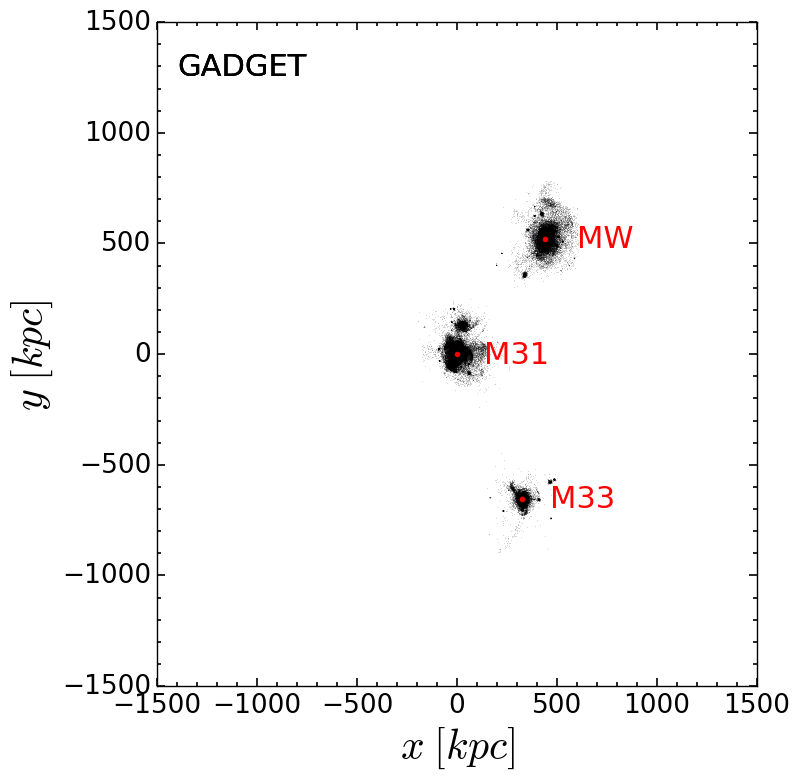

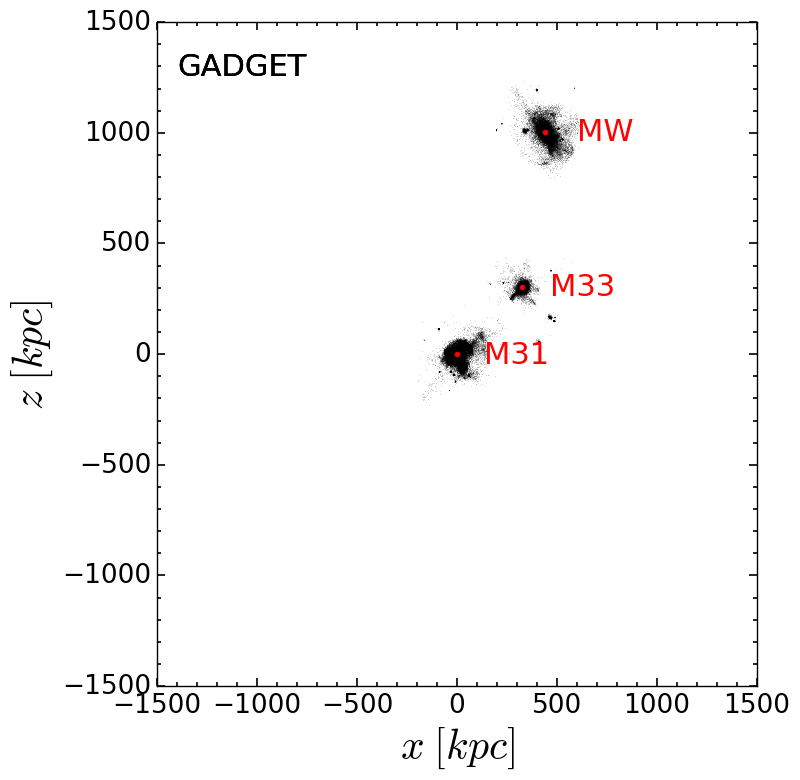

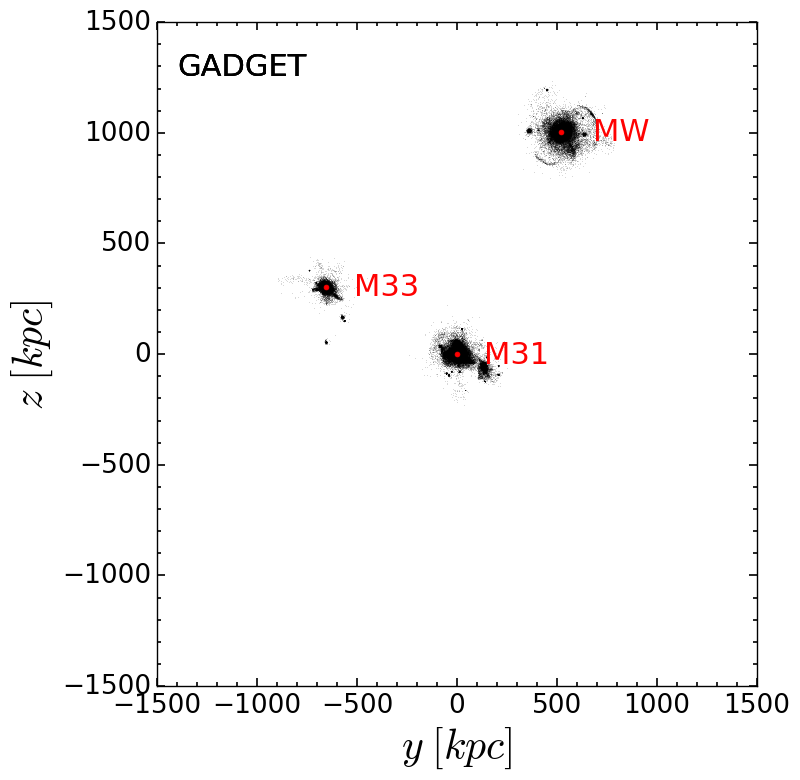

In [3]:
#Graficos de Densidad de las Estrellas
import matplotlib.pyplot as plt
import numpy as np
import h5py
import sphviewer as sph

h=0.732
a0=1
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
vector = ('00','01','03')
vector2 = ('M31', 'MW', 'M33')

xx =[]
yy =[]
zz =[]
masa =[]
snapshot=range(497,496,-1)
for isnap in snapshot:
    snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')
    
    #print isnap
    for i in range(0,3):
        pstr = snap['subhalo_0'+ str('%s'%vector[i]) +'/Str/Coordinates'].value
        cm   = snap['subhalo_0'+ str('%s'%vector[i]) +'/Center'].value
        aexp = snap['subhalo_0'+ str('%s'%vector[i]) +'/Time'].value
        masa_str = snap['subhalo_0'+ str('%s' %vector[i]) + '/Str/Masses'].value
        masa_str = masa_str/h
        cm0   = snap['subhalo_000/Center'].value
        cm1   = snap['subhalo_001/Center'].value
        
        xstr = (pstr[:,0]-cm0[0])*aexp/h
        ystr = (pstr[:,1]-cm0[1])*aexp/h
        zstr = (pstr[:,2]-cm0[2])*aexp/h
        cm = cm*aexp/h
        cm0 = cm0*aexp/h
        cm1 = cm1*aexp/h
        
        d1 = cm[0] - cm0[0]
        d2 = cm[1] - cm0[1]
        d3 = cm[2] - cm0[2]
        
        dist = np.sqrt(d1**2+d2**2+d3**2)
        
        d11 = cm[0] - cm1[0]
        d22 = cm[1] - cm1[1]
        d33 = cm[2] - cm1[2]
        
        dist2 = np.sqrt(d11**2+d22**2+d33**2)
        
        print 'distancia a M31=',dist,'distancia a MW=', dist2

        fig=plt.figure(1, figsize=(8,8))
        fig.subplots_adjust(bottom=0.12, left =0.2, right = 0.95, top = 0.95)
        ax=fig.add_subplot(111)
        #plt.imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
        ax.plot(xstr,ystr,'.', markersize=0.1, color = 'k')
        ax.plot(cm[0]-cm0[0],cm[1]-cm0[1],'.', markersize=7, color = 'red')
        ax.set_ylim(-1500,1500)
        ax.set_xlim(-1500,1500)
        #ax.set_title('sh00', fontsize=22)
        #ax.set_title('Gadget - StrXY', fontsize=20)
        ax.set_xlabel(u'$x\;[kpc]$', fontsize=30)
        ax.set_ylabel(u'$y\;[kpc]$', fontsize=30)
        ax.minorticks_on()
        ax.tick_params( labelsize=19)
        ax.tick_params('both', length=3, width=1.2,which='minor')
        ax.tick_params('both', length=6, width=1.2,which='major')
        plt.text(x = cm[0]-cm0[0]+300, y = cm[1]-cm0[1], s =str('%s'%vector2[i]), fontsize = 22, 
                verticalalignment = 'center', horizontalalignment = 'center', color = 'r')
        plt.text(x=-1400, y=1300, s='GADGET',fontsize=22,color='k', ha='left',va='center')
        fig.savefig('/home/ornela/Escritorio/mi_tesis/Figures/GD_strXY.png', dpi = 100)

            
        fig=plt.figure(2, figsize=(8,8))
        fig.subplots_adjust(bottom=0.12, left =0.2, right = 0.95, top = 0.95)
        ax=fig.add_subplot(111)
        ax.plot(xstr,zstr,'.', markersize=0.1, color = 'k')
        ax.plot(cm[0]-cm0[0],cm[2]-cm0[2],'.', markersize=7, color = 'red')
        ax.set_ylim(-1500,1500)
        ax.set_xlim(-1500,1500)
        #x.set_title('Gadget - StrXZ', fontsize=20)
        ax.set_xlabel(u'$x\;[kpc]$', fontsize=30)
        ax.set_ylabel(u'$z\;[kpc]$', fontsize=30)
        ax.minorticks_on()
        ax.tick_params( labelsize=19)
        ax.tick_params('both', length=3, width=1.2,which='minor')
        ax.tick_params('both', length=6, width=1.2,which='major')

        plt.text(x = cm[0]-cm0[0]+300, y = cm[2]-cm0[2], s =str('%s'%vector2[i]), fontsize = 22, 
               verticalalignment = 'center', horizontalalignment = 'center', color = 'r')
        plt.text(x=-1400, y=1300, s='GADGET',fontsize=22,color='k', ha='left',va='center')
        fig.savefig('/home/ornela/Escritorio/mi_tesis/Figures/GD_strXZ.png', dpi = 100)

        fig=plt.figure(3, figsize=(8,8))
        fig.subplots_adjust(bottom=0.12, left =0.2, right = 0.95, top = 0.95)
        ax=fig.add_subplot(111)
        ax.plot(ystr,zstr,'.', markersize=0.1, color = 'k')
        ax.plot(cm[1]-cm0[1],cm[2]-cm0[2],'.', markersize=7, color = 'red')
        ax.set_ylim(-1500,1500)
        ax.set_xlim(-1500,1500)
        #ax.set_title('Gadget - StrYZ', fontsize=20)
        ax.set_xlabel(u'$y\;[kpc]$', fontsize=30)
        ax.set_ylabel(u'$z\;[kpc]$', fontsize=30)
        ax.minorticks_on()
        ax.tick_params( labelsize=19)
        ax.tick_params('both', length=3, width=1.2,which='minor')
        ax.tick_params('both', length=6, width=1.2,which='major')

        plt.text(x = cm[1]-cm0[1]+300, y = cm[2]-cm0[2], s = str('%s'%vector2[i]), fontsize = 22, 
                verticalalignment = 'center', horizontalalignment = 'center', color = 'r')
        plt.text(x=-1400, y=1300, s='GADGET',fontsize=22,color='k', ha='left',va='center')
        #fig.savefig('/home/ornela/Escritorio/mi_tesis/Figures/GD_strYZ.png', dpi = 100)
plt.show()


497


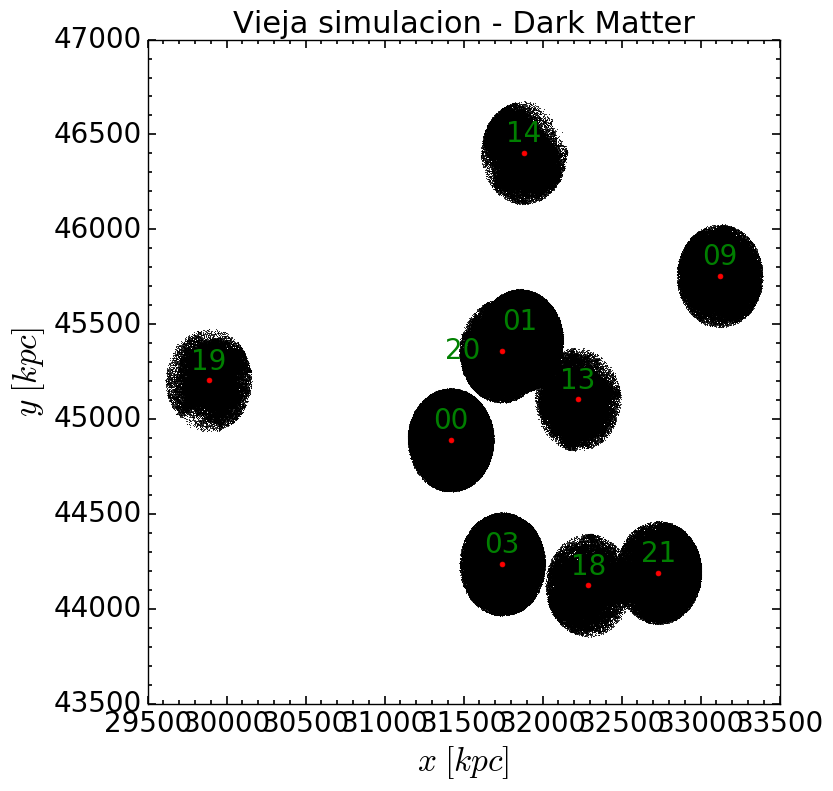

In [10]:
#Graficos de Densidad de las Estrellas
import matplotlib.pyplot as plt
import numpy as np
import h5py

h=0.732
a0=1
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
vector = ('00','01','03','09','13','14','18','19','20','21')

snapshot=range(497,496,-1)
for isnap in snapshot:
    snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')
    
    print isnap
    for i in range(0,10):
        pdrk = snap['subhalo_0'+ str('%s'%vector[i]) +'/Drk/Coordinates'].value
        cm   = snap['subhalo_0'+ str('%s'%vector[i]) +'/Center'].value

        xdrk = pdrk[:,0]/h
        ydrk = pdrk[:,1]/h
        zdrk = pdrk[:,2]/h
        cm = cm/h
        
        fig=plt.figure(1, figsize=(8,8))
        fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
        ax=fig.add_subplot(111)
        ax.plot(xdrk,ydrk,'.', markersize=0.5, color = 'k')
        ax.plot(cm[0],cm[1],'.', markersize=7, color = 'red')
        #ax.set_ylim(-1000,1000)
        #ax.set_xlim(-0.7,0)
        #ax.set_title('sh00', fontsize=22)
        ax.set_title('Vieja simulacion - Dark Matter', fontsize=22)
        ax.set_xlabel(u'$x\;[kpc]$', fontsize=24)
        ax.set_ylabel(u'$y\;[kpc]$', fontsize=24)
        ax.minorticks_on()
        ax.tick_params( labelsize=20)
        ax.tick_params('both', length=3, width=1.2,which='minor')
        ax.tick_params('both', length=6, width=1.2,which='major')
        if i != 8:
            plt.text(x = cm[0], y = cm[1]+100, s = str('%s'%vector[i]), fontsize = 20, 
                     verticalalignment = 'center', horizontalalignment = 'center', color = 'g')
        else:
            plt.text(x = cm[0]-250, y = cm[1], s =str('%s'%vector[i]), fontsize = 20, 
                     verticalalignment = 'center', horizontalalignment = 'center', color = 'g')
plt.show()

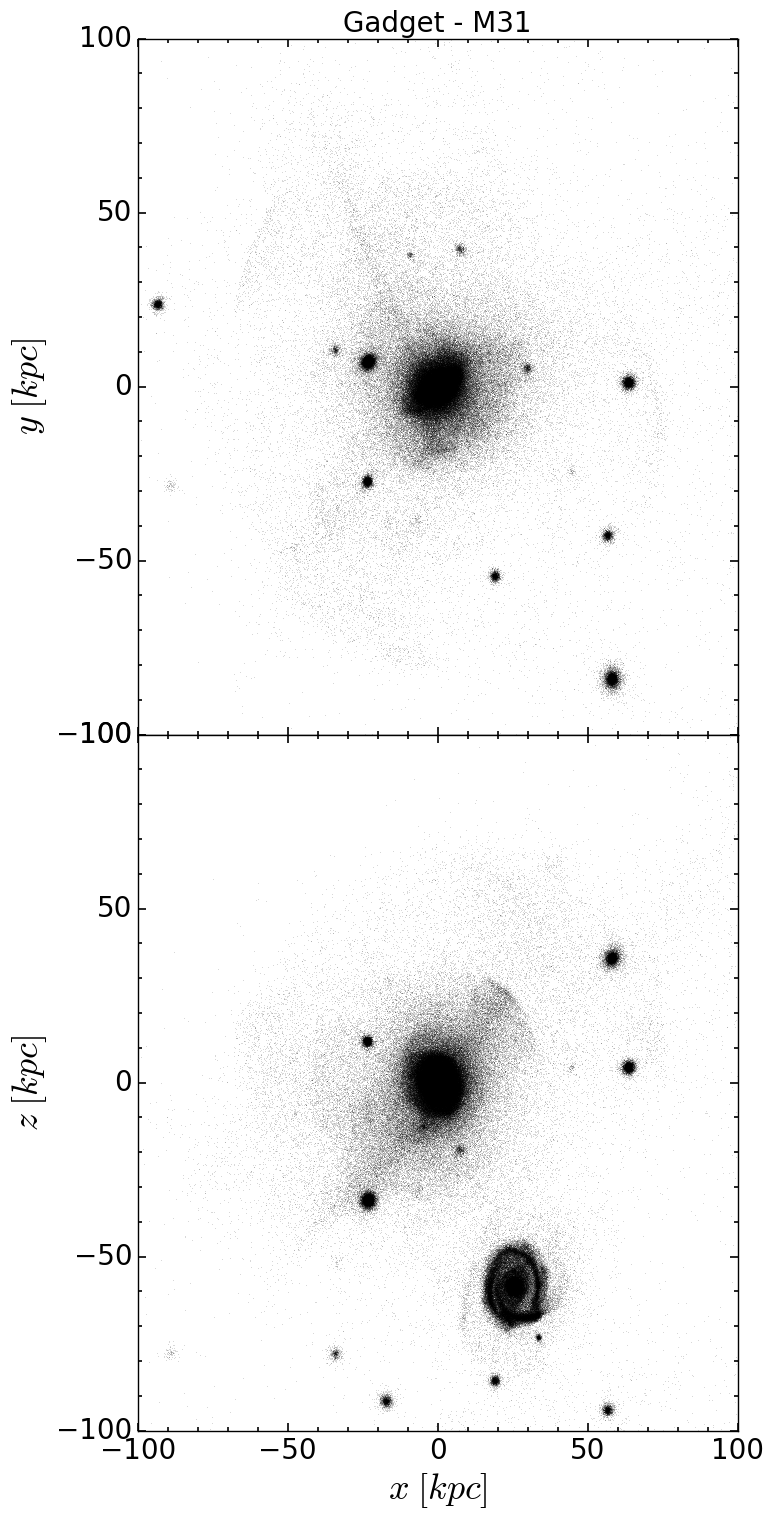

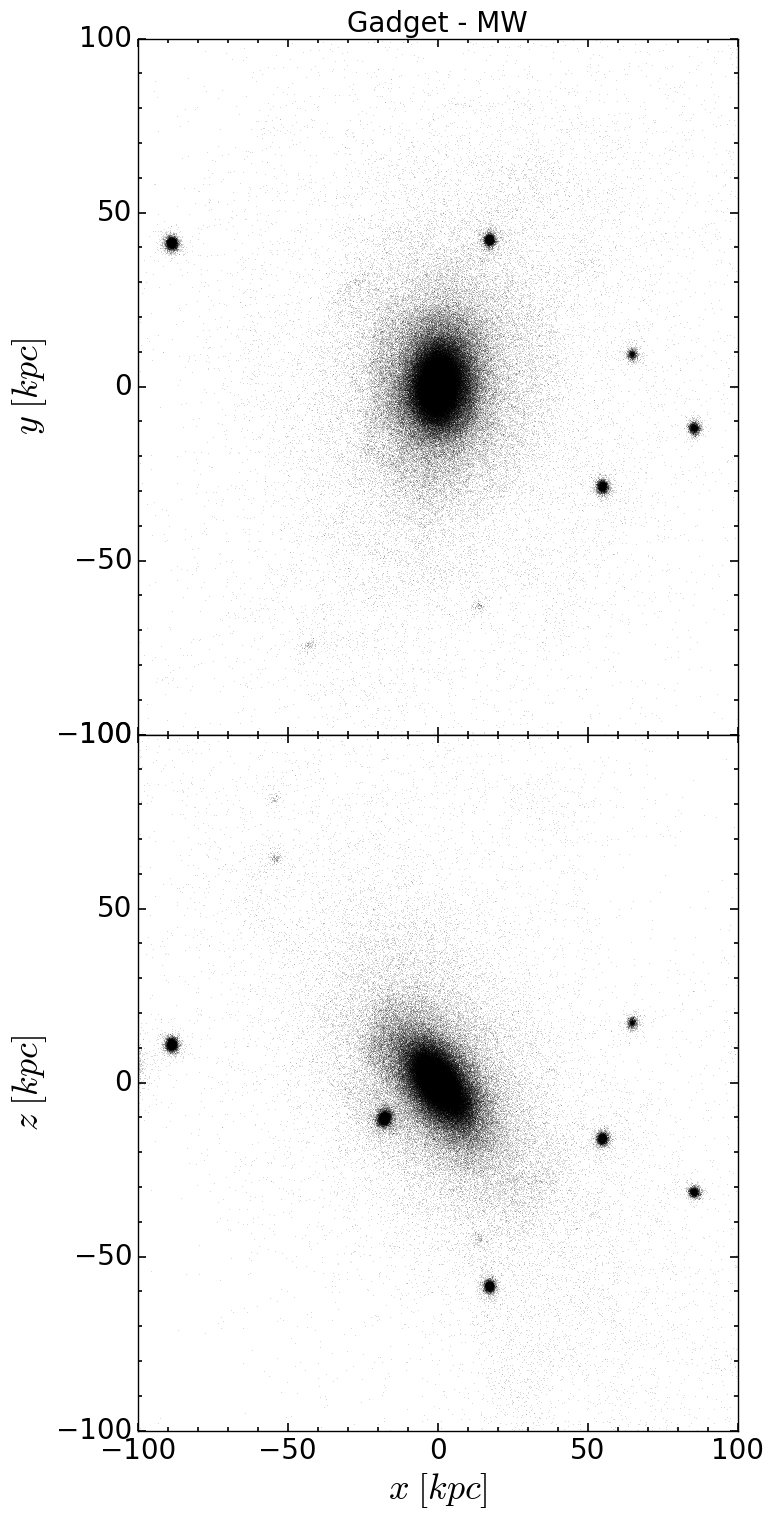

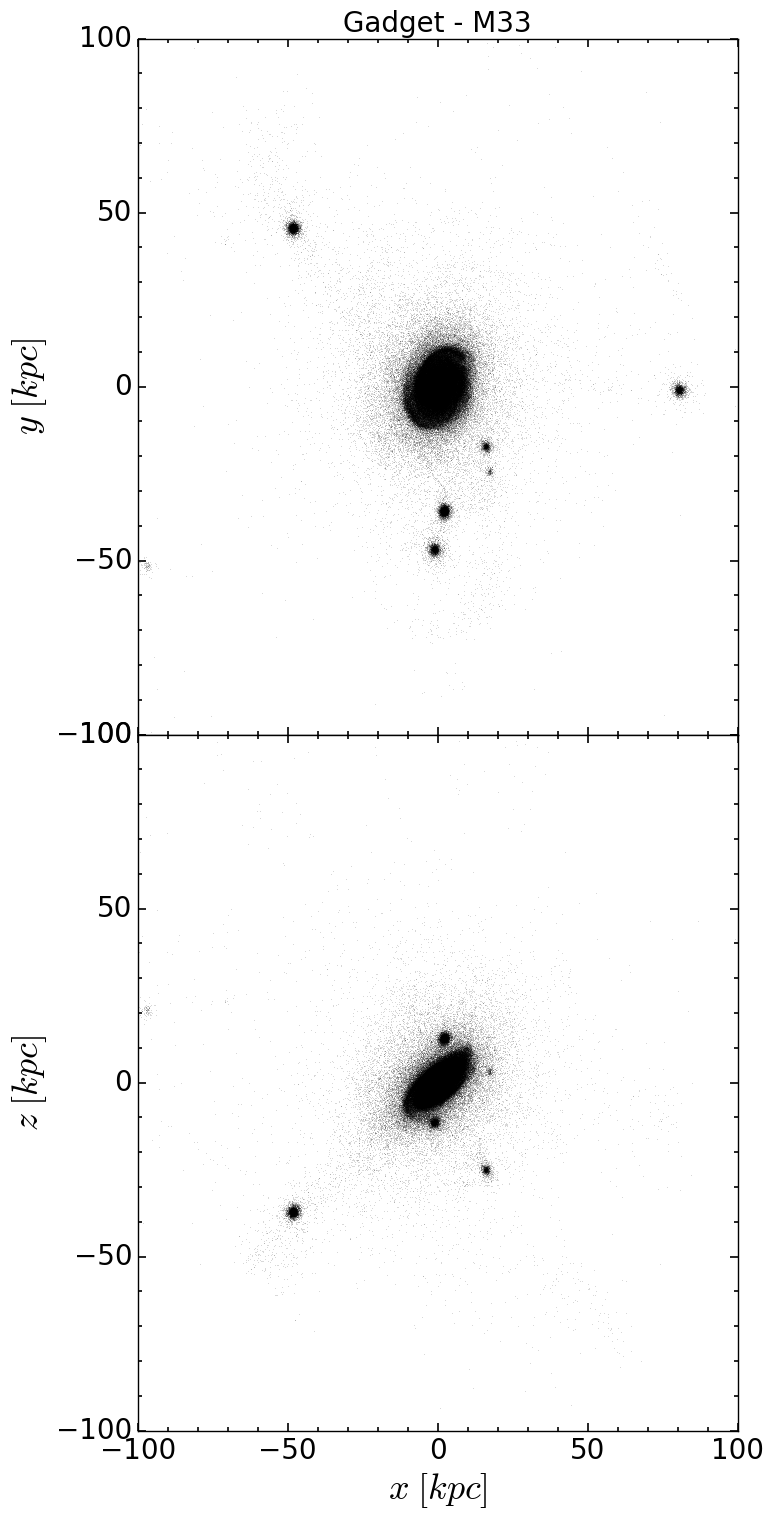

In [11]:
import matplotlib.pyplot as plt
import h5py

h=0.732
vector = ('0','1','3')
vector2 = ('M31','MW','M33')
#snapshot = np.loadtxt('/z/dalgorry/snapshots.txt', dtype='string')
#snum = len(snapshot)

#for j in range(snum-1,snum-2,-1):
    #print j, snapshot[j]
snap = h5py.File('/home/ornela/python/ornella/outputs_1/snap_497.h5py', 'r')

for i in range(0,3):
    cm   = snap['subhalo_00'+ str('%s' %vector[i])+ '/Center'].value
    aexp = snap['subhalo_00'+ str('%s'%vector[i]) +'/Time'].value

    pstr = snap['subhalo_00'+ str('%s'%vector[i]) + '/Str/Coordinates'].value

#---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = (pstr[:,0]-cm[0])*aexp/h
    ystr = (pstr[:,1]-cm[1])*aexp/h
    zstr = (pstr[:,2]-cm[2])*aexp/h

    fig=plt.figure(i,figsize=(8,16))
    fig.subplots_adjust(bottom=0.08, left =0.2, right = 0.95, top = 0.95, wspace=0.3, hspace= 0)

    ax1=fig.add_subplot(211)
    ax1.plot(xstr,ystr,'.', markersize=0.1, color = 'k')
    #ax1.plot(cm[0],cm[1],'.', markersize=7, color = 'red')
    ax1.set_ylim(-100,100)
    ax1.set_xlim(-100,100)
    ax1.set_title('Gadget - '+'%s'%vector2[i], fontsize=20)
    ax1.set_xticklabels([])
    #ax1.set_xlabel(u'$x\;[kpc]$', fontsize=24)
    ax1.set_ylabel(u'$y\;[kpc]$', fontsize=26)
    ax1.minorticks_on()
    ax1.tick_params( labelsize=20)
    ax1.tick_params('both', length=3, width=1.2,which='minor')
    ax1.tick_params('both', length=6, width=1.2,which='major')

    ax2=fig.add_subplot(212)
    ax2.plot(xstr,zstr,'.', markersize=0.1, color = 'k')
    #ax2.plot(cm[0],cm[2],'.', markersize=7, color = 'red')
    ax2.set_ylim(-100,100)
    ax2.set_xlim(-100,100)
    #ax2.set_title('Gasoline - StrXZ', fontsize=20)
    ax2.set_xlabel(u'$x\;[kpc]$', fontsize=26)
    ax2.set_ylabel(u'$z\;[kpc]$', fontsize=26)
    ax2.minorticks_on()
    ax2.tick_params( labelsize=20)
    ax2.tick_params('both', length=3, width=1.2,which='minor')
    ax2.tick_params('both', length=6, width=1.2,which='major')

    #plt.text(x = cm[0]+100, y = cm[2], s = str('%s'%vector2[i]), fontsize = 20, 
    #          verticalalignment = 'center', horizontalalignment = 'center', color = 'r')   
    #fig.savefig('/z/dalgorry/plots/Gasoline_'+'%s'%vector2[i]+'.png', dpi = 100)
    fig.savefig('/home/ornela/Escritorio/seminario2/imagenes/Gadget_'+'%s'%vector2[i]+'.png', dpi = 100)
    
    
plt.show()